Found 5216 images belonging to 2 classes.


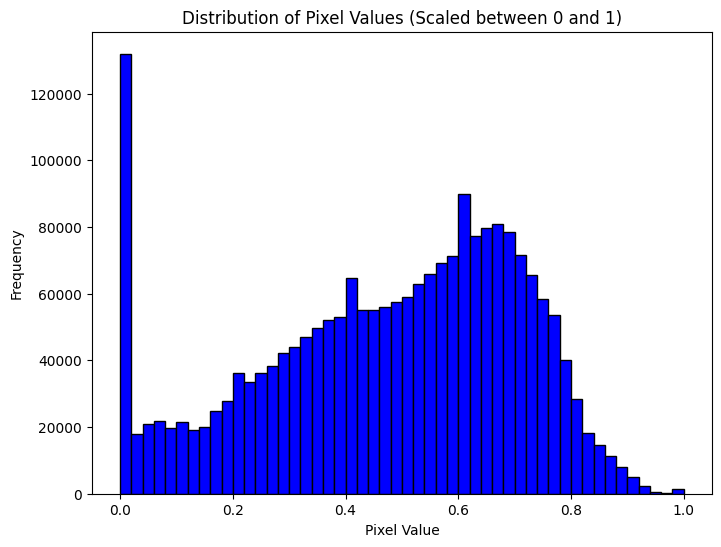

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới thư mục train (cần thay thế bằng đường dẫn của bạn)
train_data_dir = r'D:\HuynhKom\chest_xray\train'

# Khởi tạo ImageDataGenerator để chuẩn hóa giá trị pixel từ [0, 255] về [0, 1]
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

# Tạo generator cho dữ liệu train
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),  # Kích thước hình ảnh (có thể thay đổi)
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Lấy một batch dữ liệu từ train_generator
images, labels = next(train_generator)

# Chuyển đổi images từ shape (batch_size, height, width, channels) về dạng 1D để vẽ histogram
flattened_images = images.flatten()

# Vẽ biểu đồ histogram của giá trị pixel
plt.figure(figsize=(8, 6))
plt.hist(flattened_images, bins=50, color='blue', edgecolor='black')
plt.title("Distribution of Pixel Values (Scaled between 0 and 1)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


Found 5216 images belonging to 2 classes.


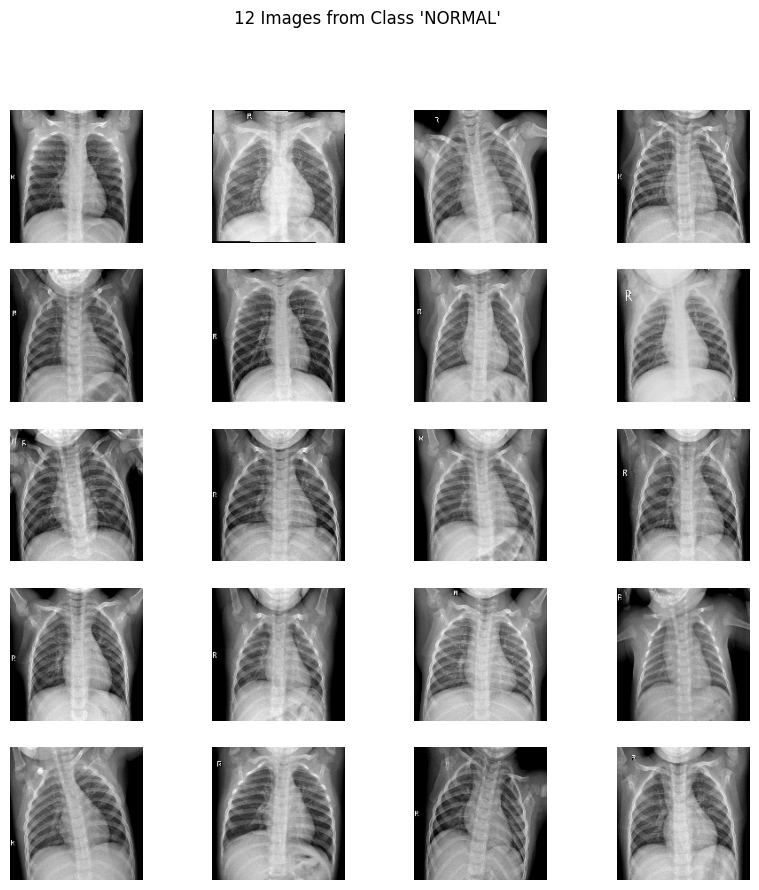

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn đến thư mục train
train_data_dir = r'D:\HuynhKom\chest_xray\train'

# Khởi tạo ImageDataGenerator với chuẩn hóa pixel
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

# Tạo generator chỉ cho lớp NORMAL
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),      # Kích thước hình ảnh (có thể thay đổi)
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Tạo danh sách để lưu trữ ảnh NORMAL
normal_images = []

# Lặp qua nhiều batch để thu thập đủ ảnh NORMAL
for images, labels in train_generator:
    normal_images.extend(images[labels == 0])
    if len(normal_images) >= 20:
        break

# Chỉ giữ lại 20 ảnh đầu tiên từ lớp NORMAL nếu có nhiều hơn 20 ảnh
normal_images = np.array(normal_images[:20])

# Hiển thị ảnh nếu đã thu thập đủ
if len(normal_images) < 20:
    print("Không có đủ ảnh NORMAL để hiển thị.")
else:
    plt.figure(figsize=(10, 10))
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(normal_images[i])
        plt.axis("off")
    plt.suptitle("12 Images from Class 'NORMAL'")
    plt.show()


Found 5216 images belonging to 2 classes.


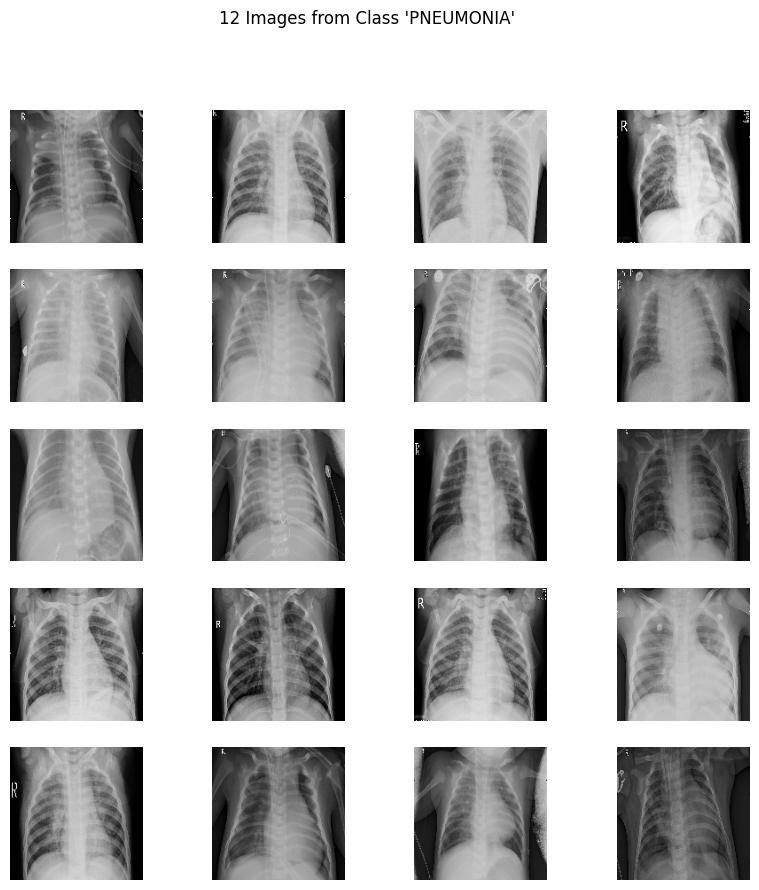

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn đến thư mục train
train_data_dir = r'D:\HuynhKom\chest_xray\train'

# Khởi tạo ImageDataGenerator với chuẩn hóa pixel
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

# Tạo generator chỉ cho tập train
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),      # Kích thước hình ảnh (có thể thay đổi)
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Tạo danh sách để lưu trữ ảnh PNEUMONIA
pneumonia_images = []

# Lặp qua nhiều batch để thu thập đủ ảnh PNEUMONIA
for images, labels in train_generator:
    pneumonia_images.extend(images[labels == 1])  # Lọc ảnh của lớp PNEUMONIA
    if len(pneumonia_images) >= 20:
        break

# Chỉ giữ lại 20 ảnh đầu tiên từ lớp PNEUMONIA nếu có nhiều hơn 20 ảnh
pneumonia_images = np.array(pneumonia_images[:20])

# Hiển thị ảnh nếu đã thu thập đủ
if len(pneumonia_images) < 20:
    print("Không có đủ ảnh PNEUMONIA để hiển thị.")
else:
    plt.figure(figsize=(10, 10))
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pneumonia_images[i])
        plt.axis("off")
    plt.suptitle("12 Images from Class 'PNEUMONIA'")
    plt.show()


Found 5216 images belonging to 2 classes.


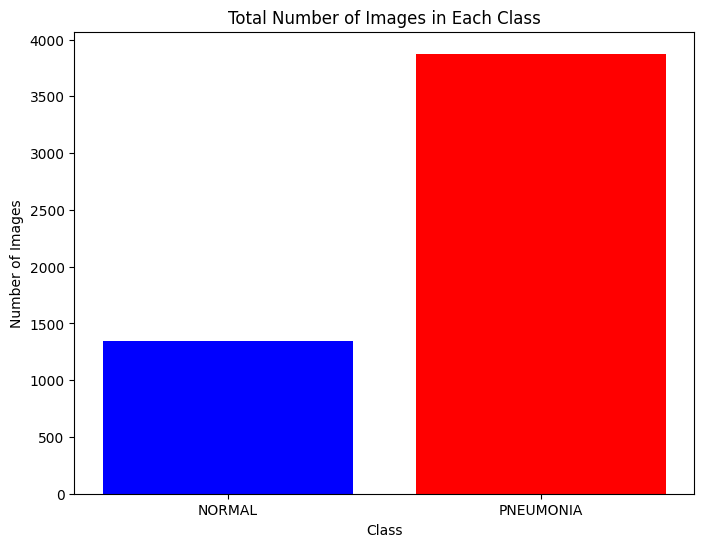

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục train
train_data_dir = r'D:\HuynhKom\chest_xray\train'

# Khởi tạo ImageDataGenerator (không cần augmentation cho việc đếm số lượng ảnh)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Tạo generator cho thư mục train để lấy số lượng ảnh
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Lấy số lượng ảnh của mỗi lớp từ thuộc tính class_indices
class_counts = train_generator.classes
num_normal = (class_counts == 0).sum()
num_pneumonia = (class_counts == 1).sum()

# Vẽ biểu đồ tổng số lượng hình ảnh của 2 lớp
plt.figure(figsize=(8, 6))
plt.bar(['NORMAL', 'PNEUMONIA'], [num_normal, num_pneumonia], color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Total Number of Images in Each Class')
plt.show()
